# Zadanie 9 - Uczenie nienadzorowane - Dominik Strzałko - 434788

# 0. Pobranie bilbiotek i wczytanie zbioru

In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('flats_for_clustering.tsv', sep="\t")

In [4]:
df

,cena,Powierzchnia w m2,Liczba pokoi,Liczba pięter w budynku,Piętro
0,290386,46,2,5.0,parter
1,450000,59,2,3.0,2
2,375000,79,3,16.0,5
3,400000,63,3,2.0,2
4,389285,59,3,13.0,12
...,...,...,...,...,...
4933,329900,97,4,4.0,4
4934,695303,48,2,4.0,3
4935,344152,67,3,2.0,parter
4936,650000,161,5,1.0,NaN


# 1. Preprocessing danych oraz usuwanie wartości odstających

In [5]:
df['Piętro'].unique()

array(['parter', '2', '5', '12', '1', '3', nan, '8', '4', '16', '7', '6',
       'poddasze', '9', '11', '13', '14', '10', '15', 'niski parter'],
      dtype=object)

In [6]:
df['Piętro'] = df['Piętro'].apply(lambda x: 0 if x in [' parter', ' niski parter'] else x)
df.drop(df[df['Piętro'] == ' poddasze'].index, inplace=True)
df['Piętro'] = df['Piętro'].apply(pd.to_numeric, errors='coerce')

In [7]:
df['Piętro'].unique()

array([nan,  2.,  5., 12.,  1.,  3.,  8.,  4., 16.,  7.,  6.,  9., 11.,
       13., 14., 10., 15.])

In [8]:
df.dropna(how='any', inplace=True)

<Figure size 3600x3600 with 0 Axes>

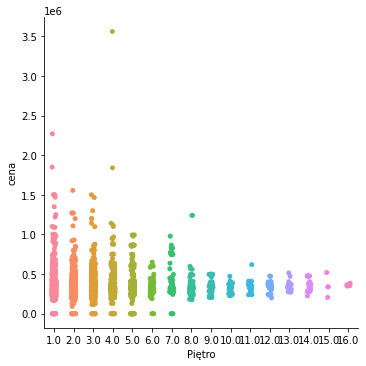

In [9]:
plt.figure(figsize=(50,50))
sns.catplot(x='Piętro',y='cena', data=df)
plt.show()

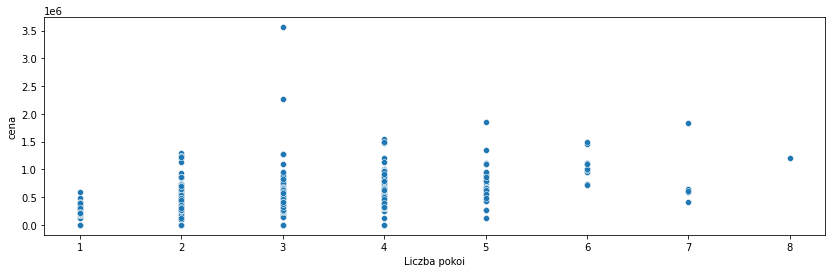

In [10]:
plt.figure(figsize=(14,4))
sns.scatterplot(x=df['Liczba pokoi'], y=df['cena']);

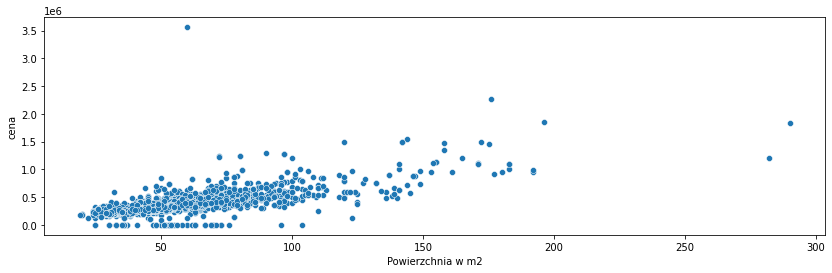

In [11]:
plt.figure(figsize=(14,4))
sns.scatterplot(x=df['Powierzchnia w m2'], y=df['cena']);

In [12]:
df[df['Powierzchnia w m2']>=750]

,cena,Powierzchnia w m2,Liczba pokoi,Liczba pięter w budynku,Piętro


In [13]:
df.drop(df[df['Powierzchnia w m2'] >=750].index, inplace=True)

In [14]:
df[df['cena']>=2500000]

,cena,Powierzchnia w m2,Liczba pokoi,Liczba pięter w budynku,Piętro
1416,3559725,60,3,4.0,4.0


In [15]:
df.drop(df[df['cena']>=2500000].index, inplace=True)

In [16]:
df.drop(df[df['cena']<=100].index, inplace=True)

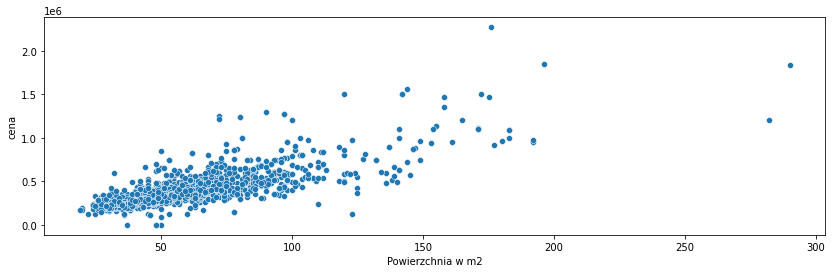

In [17]:
plt.figure(figsize=(14,4))
sns.scatterplot(x=df['Powierzchnia w m2'], y=df['cena']);

# 2. PCA oraz klastrowanie

In [18]:
def pca(X, k):
    X_std = StandardScaler().fit_transform(X)  # normalizacja
    mean_vec = np.mean(X_std, axis=0)
    cov_mat = np.cov(X_std.T)  # macierz kowariancji
    n = cov_mat.shape[0]
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)  # wektory własne
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i])
                 for i in range(len(eig_vals))]
    eig_pairs.sort()
    eig_pairs.reverse()
    matrix_w = np.hstack([eig_pairs[i][1].reshape(n, 1)
                          for i in range(k)])  # wybór
    return X_std.dot(matrix_w)  # transformacja

In [19]:
def plot_unlabeled_data(X, col1=0, col2=1, x1label=r'$x_1$', x2label=r'$x_2$'):    
    fig = plt.figure(figsize=(16*.7, 9*.7))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    X1 = X[:, col1].tolist()
    X2 = X[:, col2].tolist()
    ax.scatter(X1, X2, c='k', marker='o', s=50, label='Dane')
    ax.set_xlabel(x1label)
    ax.set_ylabel(x2label)
    ax.margins(.05, .05)
    return fig

### 2.1. KMeans z pakietu SciKit

In [22]:
kmeans = KMeans(n_clusters=5, random_state=10).fit(df)
kmeans.labels_

array([0, 0, 0, ..., 0, 2, 3], dtype=int32)

### 2.2. PCA z kodu z wykładu + Plot

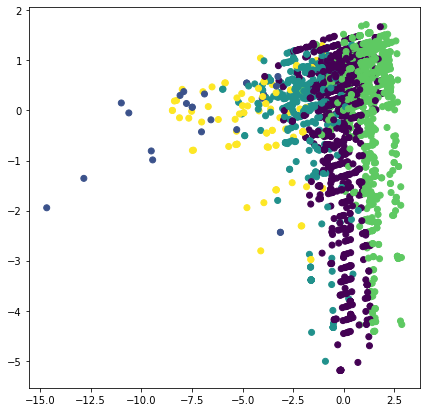

In [23]:
# X - dane ze zbioru "iris" z poprzedniego przykładu
X_pca = pca(df, 2)
plt.figure(figsize=(7,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)
plt.show()